In [1]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load a subset with 1000 instances of the MNIST digits dataset
trains = pd.read_csv("AustraliaTrain_pp.csv")
trains.dropna(axis=0)
X = trains[
    [
        "Sydney","Melbourn","Brisbane","Perth",
        "female","less31","above60",
        "lowinc","highinc","edubach","edugrad","license","owner","reqcar",
        "adultkid","multiple","Ampeak","Pmpeak","shopping",
        "social","info","busto","driveto","cycleto","dropedto",
        "crowded","overcrow","activity","walkfrom","bikefrom","pickedfr","parttime",
        "selfemp","outwork","peakfare","students","seniorco","costdol","intrmins","wtmins",
        "acctmins","ttmins","unknown","railsig","railmodr","costneg","wtneg"
    ]
]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [3]:
# Subset input and output features
y = trains[["prSat"]]

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1234
)

In [5]:
# Create a pipeline that fits an SVC model to training data
clf = SVC(class_weight="balanced")
clf.fit(X_train, np.ravel(y_train))

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [6]:
# Display accuracy of the classifier using the test set
clf.score(X_test, y_test)

0.4800910125142207

In [7]:
# Create a principal component analysis model with 64 components
pca_40 = PCA(n_components=40)
scaler = StandardScaler()
pipeline_pca_40 = Pipeline(steps=[("scaler", scaler), ("pca_40", pca_40), ("clf", clf)])
pipeline_pca_40.fit(X_train, np.ravel(y_train))

,steps,"[('scaler', ...), ('pca_40', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,40
,copy,True
,whiten,False
,svd_solver,'auto'


Text(0, 0.5, 'Explained variance')

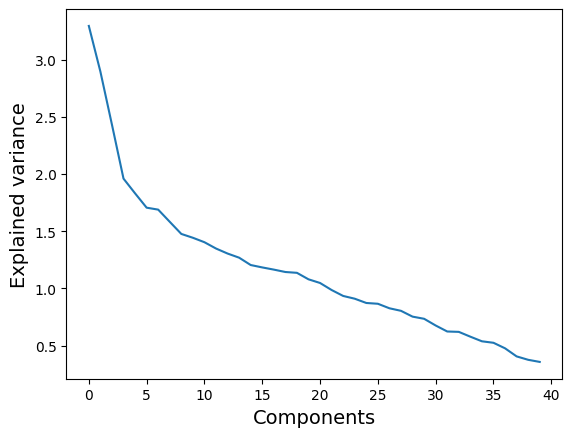

In [8]:
# Scree plot
plt.plot(pca_40.explained_variance_)
plt.xlabel("Components", size=14)
plt.ylabel("Explained variance", size=14)

In [9]:
# Create a principal component analysis model with 20 components
pca_20 = PCA(n_components=20)
pipeline_pca_20 = Pipeline(steps=[("scaler", scaler), ("pca_20", pca_20), ("clf", clf)])
pipeline_pca_20.fit(X_train, np.ravel(y_train))

,steps,"[('scaler', ...), ('pca_20', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,20
,copy,True
,whiten,False
,svd_solver,'auto'


In [10]:
# Display accuracy of the classifier using the 20 principal components
pipeline_pca_20.score(X_test, y_test)

0.49032992036405004

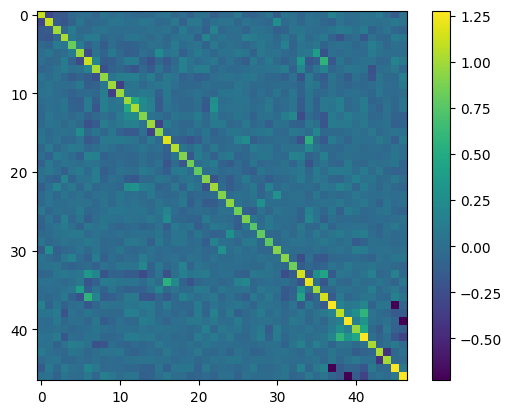

In [11]:
# Visualize the covariance matrix using a heatmap
fig, ax = plt.subplots(1)
p = plt.imshow(pca_20.get_covariance(), cmap="viridis")
fig.colorbar(p, ax=ax)
plt.show()

In [12]:
# Display covariance matrix
np.round(pd.DataFrame(pca_20.get_covariance()), 4)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.1167,-0.2999,-0.1690,-0.1664,-0.0360,-0.0117,0.0022,-0.0731,0.0434,-0.0145,...,0.1521,0.0551,-0.0108,-0.0136,0.0323,0.0269,0.0903,-0.0245,-0.1521,0.0108
1,-0.2999,1.0977,-0.1523,-0.1923,-0.0809,0.0506,-0.0644,-0.0425,-0.0147,0.0422,...,-0.0866,0.0372,-0.0294,-0.0001,0.0225,0.0234,0.0108,0.0253,0.0866,0.0294
2,-0.1690,-0.1523,1.0020,-0.0461,0.0911,-0.0350,-0.0370,0.0182,0.0424,-0.0135,...,0.0534,0.0968,0.0830,0.0143,0.0965,-0.0834,-0.0293,0.0328,-0.0534,-0.0830
3,-0.1664,-0.1923,-0.0461,1.0242,0.0577,-0.0052,0.0916,0.0902,-0.0496,-0.0134,...,-0.1002,-0.2121,-0.0513,-0.0109,-0.1757,0.0210,-0.0643,-0.0611,0.1002,0.0513
4,-0.0360,-0.0809,0.0911,0.0577,0.8103,0.0948,-0.0935,0.0060,-0.1388,-0.0133,...,-0.0093,0.0283,0.0071,-0.0511,-0.0044,0.1289,0.0503,-0.0635,0.0093,-0.0071
5,-0.0117,0.0506,-0.0350,-0.0052,0.0948,0.9748,-0.2613,0.0245,-0.0738,0.0862,...,0.0075,-0.0253,0.0160,-0.0237,-0.0287,0.0878,0.0305,-0.0058,-0.0075,-0.0160
6,0.0022,-0.0644,-0.0370,0.0916,-0.0935,-0.2613,1.1084,0.1597,-0.1385,-0.1169,...,-0.1741,0.0488,-0.0647,-0.0045,0.0222,0.0317,-0.0509,-0.0441,0.1741,0.0647
7,-0.0731,-0.0425,0.0182,0.0902,0.0060,0.0245,0.1597,1.0208,-0.2237,-0.1007,...,-0.0673,-0.0099,0.0571,0.0491,0.0294,-0.2334,-0.0090,0.0114,0.0673,-0.0571
8,0.0434,-0.0147,0.0424,-0.0496,-0.1388,-0.0738,-0.1385,-0.2237,0.9405,0.0630,...,0.0417,-0.0375,-0.1334,0.0099,-0.0484,-0.1902,0.0417,-0.0350,-0.0417,0.1334
9,-0.0145,0.0422,-0.0135,-0.0134,-0.0133,0.0862,-0.1169,-0.1007,0.0630,0.9844,...,0.0269,-0.0337,-0.0723,-0.0238,-0.0518,-0.0061,0.0341,-0.0090,-0.0269,0.0723


In [13]:
# Display the amount of variance explained by the principal components
np.round(pca_20.explained_variance_, 4)

array([3.2962, 2.8968, 2.4323, 1.9603, 1.8313, 1.706 , 1.689 , 1.5824,
       1.4764, 1.4428, 1.4038, 1.3487, 1.3048, 1.2686, 1.2043, 1.1833,
       1.1642, 1.1433, 1.1361, 1.0793])

In [14]:
# Display the percentage variance explained by the principal components
np.round(pca_20.explained_variance_ratio_, 4)

array([0.0701, 0.0616, 0.0517, 0.0417, 0.0389, 0.0363, 0.0359, 0.0337,
       0.0314, 0.0307, 0.0299, 0.0287, 0.0277, 0.027 , 0.0256, 0.0252,
       0.0248, 0.0243, 0.0242, 0.023 ])